Requests y BeautifulSoup
## Parsing Pagina12

<div align="center">
<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
</div>

En este módulo veremos cómo utilizar las bibliotecas *requests* y *bs4* para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [304]:
import requests

In [305]:
url = 'https://www.pagina12.com.ar/'

In [306]:
p12 = requests.get(url)

In [307]:
p12.status_code

200

In [308]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

Buscar un título en el texto

Muchas veces la respuesta a la solicitud puede ser algo que no sea un texto: una imagen, un archivo de audio, un video, etc.

In [309]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

Analicemos otros elementos de la respuesta. Encabezados de la respuesta

In [310]:
p12.headers

{'Date': 'Thu, 30 Apr 2020 23:40:27 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d372ce3f2a3bdd23849bc18a38e9e51481588290027; expires=Sat, 30-May-20 23:40:27 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Backend': 'prod_frontend_1', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.062', 'x-debug': '', 'X-Instance': 'cache-front-prod-varnish-76c5f88cf6-l8x6d', 'x-restarts': '0', 'X-Cache': 'HIT (10)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '58c51ba1cd89ec2e-MFE', 'Conte

Encabezados de la solicitud

In [311]:
p12.request.headers

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El contenido de la request que acabamos de hacer está avisando que estamos utilizando la biblioteca requests para python y que no es un navegador convencional. Se puede modificar

In [312]:
p12.request.method

'GET'

In [313]:
p12.request.url

'https://www.pagina12.com.ar/'

p12.request.url

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [314]:
import requests

In [315]:
url = 'https://www.pagina12.com.ar/'

In [316]:
p12 = requests.get(url)

In [317]:
p12.status_code

200

In [318]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

Buscar un título en el texto

Muchas veces la respuesta a la solicitud puede ser algo que no sea un texto: una imagen, un archivo de audio, un video, etc.

In [319]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

Analicemos otros elementos de la respuesta. Encabezados de la respuesta

In [320]:
p12.headers

{'Date': 'Thu, 30 Apr 2020 23:40:28 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d1b81f1ccc496a5dbac03b78872f2ddaf1588290028; expires=Sat, 30-May-20 23:40:28 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Backend': 'prod_frontend_1', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '1', 'grace': '86400.000 none', 'ttl': '118.191', 'x-debug': '', 'X-Instance': 'cache-front-prod-varnish-76c5f88cf6-l8x6d', 'x-restarts': '0', 'X-Cache': 'HIT (18)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '58c51ba71b789a32-MFE', 'Conte

Encabezados de la solicitud

In [321]:
p12.request.headers

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El contenido de la request que acabamos de hacer está avisando que estamos utilizando la biblioteca requests para python y que no es un navegador convencional. Se puede modificar

In [322]:
p12.request.method

'GET'

In [323]:
p12.request.url

'https://www.pagina12.com.ar/'

In [324]:
from bs4 import BeautifulSoup

In [325]:
s = BeautifulSoup(p12.text, 'lxml')

In [326]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [327]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/psicologia">Psicología</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [328]:
seccion = secciones[0]

In [329]:
seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [330]:
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [331]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [332]:
seccion.a.get_text()

'El país'

In [333]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [334]:
liks_secciones = [seccion.a.get('href') for seccion in secciones]

In [335]:
liks_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/psicologia',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [336]:
sec = requests.get(liks_secciones[0])

In [337]:
sec.status_code

200

In [338]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [339]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [340]:
featured_article = s_seccion.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto">Se analizarán 400 solicitudes de las 805 presentadas, todas ellas de presos con condenas menores a tres años </a></span><h2><a href="https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto">Terminó con acuerdo la reunión en la cárcel de Devoto</a></h2><a href="https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">30 de abril de 2020</span></div></div>

In [341]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto'

In [342]:
article_list = s_seccion.find('ul', attrs={'class':'article-list'})

In [343]:
article_list

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/263109-paro-sorpresivo-de-colectivos-en-ciudad-y-provincia">Paro sorpresivo de colectivos en Ciudad y Provincia<i>|</i><span>Los choferes reclaman medidas de protección por la pandemia</span></a></h2><div class="data-bar"><span class="date-1">30 de abril de 2020</span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/263109-paro-sorpresivo-de-colectivos-en-ciudad-y-provincia"><img alt="false (Fuente: EFE)" class="lazyload show-for-xsmall

## Manejo de errores

In [344]:
def obtener_notas(soup):
    '''
    Función que recibe un objeto de BeautifulSoup de una página de una sección 
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []
    
    # Obtengo el articulo promocionado
    featured_article = soup.find('div', attrs={'class':'featured-article__container'})
    if featured_article:
        lista_notas.append(featured_article.a.get('href'))
        
    # Obtengo el listado de articulos
    article_list = soup.find('ul', attrs={'class':'article-list'})
    for article in article_list.find_all('li'):
        if article.a:
            lista_notas.append(article.a.get('href'))
            
    return lista_notas

In [345]:
lista_notas = obtener_notas(s_seccion)

In [346]:
lista_notas

['https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto',
 'https://www.pagina12.com.ar/263109-paro-sorpresivo-de-colectivos-en-ciudad-y-provincia',
 'https://www.pagina12.com.ar/263096-los-motivos-del-presidente-para-designar-a-fernanda-raverta-',
 'https://www.pagina12.com.ar/263091-andres-larroque-reemplazara-a-maria-fernanda-raverta-en-el-g',
 'https://www.pagina12.com.ar/263089-alejandro-vanoli-presento-su-renuncia-a-la-anses-la-carta-qu',
 'https://www.pagina12.com.ar/263088-alberto-fernandez-inauguro-el-hospital-bicentenario-para-hac',
 'https://www.pagina12.com.ar/263086-las-fake-news-sobre-la-liberacion-de-presos',
 'https://www.pagina12.com.ar/263078-quien-es-fernanda-raverta-la-nueva-titular-de-anses',
 'https://www.pagina12.com.ar/263075-maria-fernanda-raverta-sera-la-nueva-titular-de-la-anses',
 'https://www.pagina12.com.ar/263052-marcela-losardo-no-existe-un-plan-de-liberacion-generalizada',
 'https://www.pagina12.com.ar/263049-reunion-p

In [347]:
r = requests.get(url)
if r.status_code == 200:
    print('Procesamos la respuesta')
else:
    print('Ocurrio un error')

Procesamos la respuesta


In [348]:
url_mala = url.replace('2','3')

In [349]:
url_mala

'https://www.pagina13.com.ar/'

In [350]:
try: 
    requests.get(url_mala)
except Exception as e:
    print('Error en la request')
    print(e)
    print('\n')

Error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001B67158D4C8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))




In [351]:
try:
    featured_aticle.b.get('href')
except:
    print('Continua con el código')

Continua con el código


In [352]:
url_nota = lista_notas[0]
url_nota

'https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto'

In [353]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el título
        titulo = s_nota.find('div', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraer la fecha
        fecha = s_nota.find('span',attrs={'pubdate':'pubdate'}).get('datetime')
        print(fecha)
        # Volanta
        volanta = s_nota.find('h2', attrs={'class': 'article-prefix'})
        print(volanta.text)
        print('\n')
        # Copete
        try:
            copete = s_nota.find('div', attrs={'class':'article-summary'})
            print(copete.text)
            print('\n')
        except:
            print(None)
            print('\n')
        # Autor
        autor = s_nota.find('div', attrs={'class': 'article-author'}).a
        print(autor.text)
        print('\n')
        # Texto
        texto = s_nota.find('div', attrs={'class': 'article-text'}).find_all('p')
        articulo_texto = ''
        for pedazo_texto in texto:
            articulo_texto += pedazo_texto.text
            
        print(articulo_texto)
except Exception as e:
    print('Error: ')
    print(e)
    print('\n')

Coronavirus: se registraron 143 nuevos contagios  La Ciudad de Buenos Aires concentra el 62% de los casos
2020-04-30
Se analizarán 400 solicitudes de las 805 presentadas, todas ellas de presos con condenas menores a tres años 


None


Error: 
'NoneType' object has no attribute 'a'




In [354]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})

In [355]:
imagenes = media.find_all('img')
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/69483/whatsapp-20image-202020-04-30-20at-2017-13-58.jpeg?itok=s6Ow_Md3" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69483/whatsapp-20image-202020-04-30-20at-2017-13-58.jpeg?itok=HqHQx14W" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69483/whatsapp-20image-202020-04-30-20at-2017-13-58.jpeg?itok=HqHQx14W" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69483/whatsapp-20image-202020-04-30-20a

In [356]:
if len(imagenes) == 0:
    print('No se encontraron imagenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69483/whatsapp-20image-202020-04-30-20at-2017-13-58.jpeg?itok=HqHQx14W


In [357]:
img_req = requests.get(img_src)
img_req.status_code

200

In [358]:
img_req.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf5RR\xb0\x92\x901\x8d\xa6\x0cj\x03\x00`\x000\x86\x00\xc0\x00\x00`\x86\x08\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00!\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\x82`\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00L\x10\x02RBL"\x98EI\x11RU\x18\xce)\

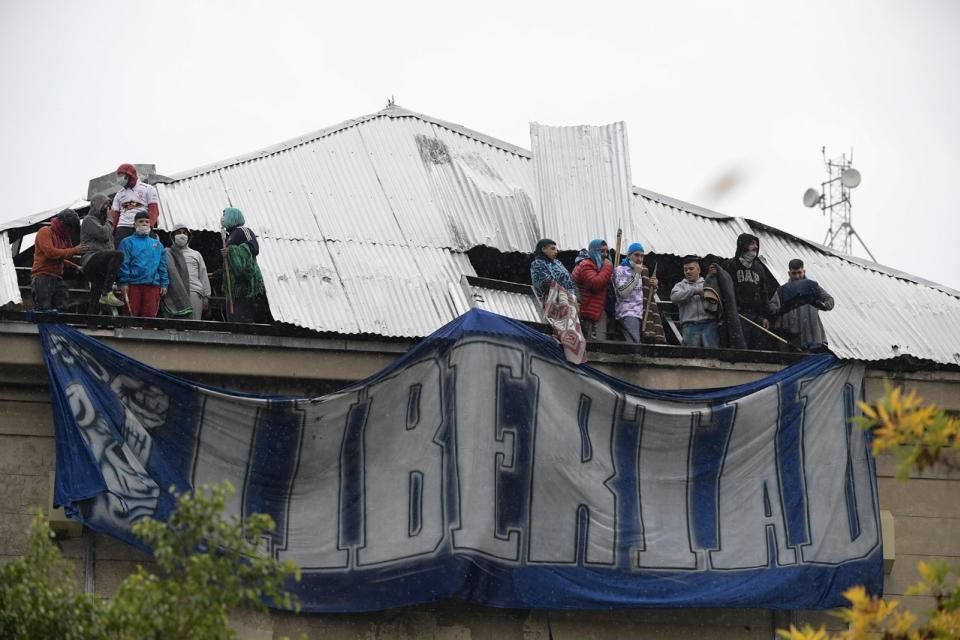

In [359]:
from IPython.display import Image
Image(img_req.content)

## Scrapper unificado

In [360]:
def obtener_info(s_nota):
    
    # Creamos un diccionario vacío para poblarlo con la información
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate':'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
    
    # Extraemos el título
    titulo = s_nota.find('div', attrs={'class':'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraemos la volanta
    try:
        volanta = s_nota.find('div', attrs={'class':'article-prefix'})
        if volanta:
            ret_dict['volanta'] = volanta.get_text()
        else:
            ret_dict['volanta'] = None
    except:
        print('Error')
    
    # Extraemos el copete
    try:
        copete = s_nota.find('div', attrs={'class':'article-summary'})
        if copete:
            ret_dict['copete'] = volanta.get_text()
        else:
            ret_dict['copete'] = None
    except:
        print('Error')
    
    autor = s_nota.find('div', attrs={'class':'article-author'})
    if autor:
        ret_dict['autor'] = autor.a.get_text()
    else:
        ret_dict['autor'] = None
    
    # Extraemos la imagen
    media = s_nota.find('div', attrs={'class':'article-main-media-image'})
    if media:
        imagenes = media.find_all('img')
        if len(imagenes) == 0:
            print('no se encontraron imágenes')
        else:
            imagen = imagenes[-1]
            img_src = imagen.get('data-src')
            try:
                img_req = requests.get(img_src)
                if img_req.status_code == 200:
                    ret_dict['imagen'] = img_req.content
                else:
                    ret_dict['imagen'] = None
            except:
                print('No se pudo obtener la imagen')
    else:
        print('No se encontró media')
    
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class':'article-text'})
    if cuerpo:
        ret_dict['texto'] = cuerpo.get_text()
    else:
        ret_dict['texto'] = None
    
    return ret_dict

In [361]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    
    if nota.status_code !=200:
        print(f'Error obteniendo nota {url}')
        print(f'stuts Code = {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [362]:
scrape_nota(url_nota)

{'fecha': '2020-04-30',
 'titulo': 'Coronavirus: se registraron 143 nuevos contagios\xa0\xa0La Ciudad de Buenos Aires concentra el 62% de los casos',
 'volanta': None,
 'copete': None,
 'autor': None,
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf5RR\xb0\x92\x901\x8d\xa6\x0cj\x03\x00`\x000\x86\x00\xc0\x00\x00`\x86\x08

In [363]:
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/psicologia',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [364]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(obtener_notas(soup))
        else:
            print('No se pudo obtener la sección', link)
    except:
        print('No se pudo obtener la sección', link)

In [365]:
notas

['https://www.pagina12.com.ar/263111-termino-con-acuerdo-la-reunion-en-la-carcel-de-devoto',
 'https://www.pagina12.com.ar/263109-paro-sorpresivo-de-colectivos-en-ciudad-y-provincia',
 'https://www.pagina12.com.ar/263096-los-motivos-del-presidente-para-designar-a-fernanda-raverta-',
 'https://www.pagina12.com.ar/263091-andres-larroque-reemplazara-a-maria-fernanda-raverta-en-el-g',
 'https://www.pagina12.com.ar/263089-alejandro-vanoli-presento-su-renuncia-a-la-anses-la-carta-qu',
 'https://www.pagina12.com.ar/263088-alberto-fernandez-inauguro-el-hospital-bicentenario-para-hac',
 'https://www.pagina12.com.ar/263086-las-fake-news-sobre-la-liberacion-de-presos',
 'https://www.pagina12.com.ar/263078-quien-es-fernanda-raverta-la-nueva-titular-de-anses',
 'https://www.pagina12.com.ar/263075-maria-fernanda-raverta-sera-la-nueva-titular-de-la-anses',
 'https://www.pagina12.com.ar/263052-marcela-losardo-no-existe-un-plan-de-liberacion-generalizada',
 'https://www.pagina12.com.ar/263049-reunion-p

In [366]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota{i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota0/106
Scrapeando nota1/106
Scrapeando nota2/106
Error
Scrapeando nota3/106
Scrapeando nota4/106
Scrapeando nota5/106
Scrapeando nota6/106
Error
Scrapeando nota7/106
Scrapeando nota8/106
Error
Scrapeando nota9/106
Error
Scrapeando nota10/106
Error
No se encontró media
Scrapeando nota11/106
Error
Scrapeando nota12/106
Scrapeando nota13/106
Scrapeando nota14/106
Scrapeando nota15/106
Scrapeando nota16/106
Error
Scrapeando nota17/106
Scrapeando nota18/106
Error
Scrapeando nota19/106
Error
Scrapeando nota20/106
Scrapeando nota21/106
Scrapeando nota22/106
Error
Scrapeando nota23/106
Scrapeando nota24/106
Error
Scrapeando nota25/106
Error
Scrapeando nota26/106
Scrapeando nota27/106
Error
Scrapeando nota28/106
Scrapeando nota29/106
Scrapeando nota30/106
Error
Scrapeando nota31/106
Error
Scrapeando nota32/106
Scrapeando nota33/106
Scrapeando nota34/106
Scrapeando nota35/106
Scrapeando nota36/106
Error
Scrapeando nota37/106
Scrapeando nota38/106
Error
Scrapeando nota39/106
Error
S

In [371]:
len(data)

106

In [372]:
import pandas as pd
df = pd.DataFrame(data)
df.head()
df.to_csv('Notas Pagina12.csv')